南大os主页： http://jyywiki.cn/OS/2023/

jupyter: http://jyywiki.cn/OS/2023/build/lect2.ipynb

计算机是一个状态机

cpu 是一个无情执行指令的机器

软件： os = 库函数（文件，进程，）

硬件： os = c 程序，  完成初始化后就成为 interrupt/trap/fault handler

操作系统有三条主线：

“软件 (应用)”、

“硬件 (计算机)”、

“操作系统 (软件直接访问硬件带来麻烦太多而引入的中间件)”。


## 1. 软件：什么是最小的os程序？

In [ ]:
示例程序 hello.c：
#include <stdio.h>
int main() {
    printf("hello world\n");
#     return 0;
}

$ gcc hello.c
$ ls
a.out  hello.c

$ objdump -d a.out | less   # 查看对应的汇编代码
$ objdump -d a.out | wc -l

--------------------------------------------------------------
$ gcc hello.c  -static  # -static 将所有用到的库都打到一起

$ objdump -d a.out  | wc -l
153688   #  hello world 一点也不小！！！！！

$ gcc hello.c  -static --verbose # 查看gcc编译时候的运行日志

(pt2) root@c30760992623:# gcc hello.c  -static --verbose               
Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/9/lto-wrapper
OFFLOAD_TARGET_NAMES=nvptx-none:hsa
OFFLOAD_TARGET_DEFAULT=1
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 9.4.0-1ubuntu1~20.04.1' --with-bugurl=file:///usr/share/doc/gcc-9/README.Bugs --enable-languages=c,ada,c++,go,brig,d,fortran,objc,obj-c++,gm2 --prefix=/usr --with-gcc-major-version-only --program-suffix=-9 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-plugin --enable-default-pie --with-system-zlib --with-target-system-zlib=auto --enable-objc-gc=auto --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with-multilib-list=m32,m64,mx32 --enable-multilib --with-tune=generic --enable-offload-targets=nvptx-none=/build/gcc-9-Av3uEd/gcc-9-9.4.0/debian/tmp-nvptx/usr,hsa --without-cuda-driver --enable-checking=release --build=x86_64-linux-gnu --host=x86_64-linux-gnu --target=x86_64-linux-gnu
Thread model: posix
gcc version 9.4.0 (Ubuntu 9.4.0-1ubuntu1~20.04.1) 
COLLECT_GCC_OPTIONS='-static' '-v' '-mtune=generic' '-march=x86-64'
 /usr/lib/gcc/x86_64-linux-gnu/9/cc1 -quiet -v -imultiarch x86_64-linux-gnu hello.c -quiet -dumpbase hello.c -mtune=generic -march=x86-64 -auxbase hello -version -fasynchronous-unwind-tables -fstack-protector-strong -Wformat -Wformat-security -fstack-clash-protection -fcf-protection -o /tmp/cckpctWR.s
GNU C17 (Ubuntu 9.4.0-1ubuntu1~20.04.1) version 9.4.0 (x86_64-linux-gnu)
        compiled by GNU C version 9.4.0, GMP version 6.2.0, MPFR version 4.0.2, MPC version 1.1.0, isl version isl-0.22.1-GMP

warning: GMP header version 6.2.0 differs from library version 6.2.1.
warning: MPFR header version 4.0.2 differs from library version 4.1.0.
warning: MPC header version 1.1.0 differs from library version 1.2.1.
GGC heuristics: --param ggc-min-expand=100 --param ggc-min-heapsize=131072
ignoring nonexistent directory "/usr/local/include/x86_64-linux-gnu"
ignoring nonexistent directory "/usr/lib/gcc/x86_64-linux-gnu/9/include-fixed"
ignoring nonexistent directory "/usr/lib/gcc/x86_64-linux-gnu/9/../../../../x86_64-linux-gnu/include"
#include "..." search starts here:
#include <...> search starts here:
 /usr/lib/gcc/x86_64-linux-gnu/9/include
 /usr/local/include
 /usr/include/x86_64-linux-gnu
 /usr/include
End of search list.
GNU C17 (Ubuntu 9.4.0-1ubuntu1~20.04.1) version 9.4.0 (x86_64-linux-gnu)
        compiled by GNU C version 9.4.0, GMP version 6.2.0, MPFR version 4.0.2, MPC version 1.1.0, isl version isl-0.22.1-GMP

warning: GMP header version 6.2.0 differs from library version 6.2.1.
warning: MPFR header version 4.0.2 differs from library version 4.1.0.
warning: MPC header version 1.1.0 differs from library version 1.2.1.
GGC heuristics: --param ggc-min-expand=100 --param ggc-min-heapsize=131072
Compiler executable checksum: c0c95c0b4209efec1c1892d5ff24030b
COLLECT_GCC_OPTIONS='-static' '-v' '-mtune=generic' '-march=x86-64'
 as -v --64 -o /tmp/cc6MoLY7.o /tmp/cckpctWR.s
GNU assembler version 2.34 (x86_64-linux-gnu) using BFD version (GNU Binutils for Ubuntu) 2.34
COMPILER_PATH=/usr/lib/gcc/x86_64-linux-gnu/9/:/usr/lib/gcc/x86_64-linux-gnu/9/:/usr/lib/gcc/x86_64-linux-gnu/:/usr/lib/gcc/x86_64-linux-gnu/9/:/usr/lib/gcc/x86_64-linux-gnu/
LIBRARY_PATH=/usr/lib/gcc/x86_64-linux-gnu/9/:/usr/lib/gcc/x86_64-linux-gnu/9/../../../x86_64-linux-gnu/:/usr/lib/gcc/x86_64-linux-gnu/9/../../../../lib/:/lib/x86_64-linux-gnu/:/lib/../lib/:/usr/lib/x86_64-linux-gnu/:/usr/lib/../lib/:/usr/local/cuda/lib64/stubs/:/usr/lib/gcc/x86_64-linux-gnu/9/../../../:/lib/:/usr/lib/
COLLECT_GCC_OPTIONS='-static' '-v' '-mtune=generic' '-march=x86-64'
 /usr/lib/gcc/x86_64-linux-gnu/9/collect2 -plugin /usr/lib/gcc/x86_64-linux-gnu/9/liblto_plugin.so -plugin-opt=/usr/lib/gcc/x86_64-linux-gnu/9/lto-wrapper -plugin-opt=-fresolution=/tmp/ccFm6hwp.res -plugin-opt=-pass-through=-lgcc -plugin-opt=-pass-through=-lgcc_eh -plugin-opt=-pass-through=-lc --build-id -m elf_x86_64 --hash-style=gnu --as-needed -static -z relro /usr/lib/gcc/x86_64-linux-gnu/9/../../../x86_64-linux-gnu/crt1.o /usr/lib/gcc/x86_64-linux-gnu/9/../../../x86_64-linux-gnu/crti.o /usr/lib/gcc/x86_64-linux-gnu/9/crtbeginT.o -L/usr/lib/gcc/x86_64-linux-gnu/9 -L/usr/lib/gcc/x86_64-linux-gnu/9/../../../x86_64-linux-gnu -L/usr/lib/gcc/x86_64-linux-gnu/9/../../../../lib -L/lib/x86_64-linux-gnu -L/lib/../lib -L/usr/lib/x86_64-linux-gnu -L/usr/lib/../lib -L/usr/local/cuda/lib64/stubs -L/usr/lib/gcc/x86_64-linux-gnu/9/../../.. /tmp/cc6MoLY7.o --start-group -lgcc -lgcc_eh -lc --end-group /usr/lib/gcc/x86_64-linux-gnu/9/crtend.o /usr/lib/gcc/x86_64-linux-gnu/9/../../../x86_64-linux-gnu/crtn.o
COLLECT_GCC_OPTIONS='-static' '-v' '-mtune=generic' '-march=x86-64'
(pt2) root@c30760992623:# 




$ gcc  hello.c  -static -Wl,--verbose | less  # 可以查看所有链接选项

这样的程序不满足最小!!!

计算机世界里没有任何魔法

## 2. 开始构造最小的应用程序



In [ ]:
示例程序 hello.c：

int main() {

}

$ gcc -c hello.c
$ objdump -d hello.o
0000000000000000 <main>:
   0:   f3 0f 1e fa             endbr64
   4:   55                      push   %rbp    # 
   5:   48 89 e5                mov    %rsp,%rbp # rsp--> rbp
   8:   b8 00 00 00 00          mov    $0x0,%eax  # eax 返回值
   d:   5d                      pop    %rbp
   e:   c3                      ret

# 指定 main是入口
$ gcc -c hello.c && ld hello.o -e main  && ./a.out

Segmentation fault

注： 
rbp, rsp 分别是栈底和栈顶指针,
参考：[notes/函数栈帧调用(补充).ipynb](https://github.com/sunnysky29/os/blob/main/notes/%E5%87%BD%E6%95%B0%E6%A0%88%E5%B8%A7%E8%B0%83%E7%94%A8(%E8%A1%A5%E5%85%85).ipynb)


##  3.gdb调试，探究Segmentation fault 原因

In [ ]:
$ gdb a.out
GNU gdb (Ubuntu 12.1-0ubuntu1~22.04) 12.1
....................
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from a.out...
(No debugging symbols found in a.out)
(gdb) starti  #  从程序的第一条指令执行
Starting program: /os/lect2/a.out

Program stopped.
0x0000000000401000 in main ()
(gdb)layout asm  # text UI
(gdb)si
(gdb)info registers  
(gdb)p $rsp
(gdb)x $rsp # 0x00000001
(gdb)si
0x0...0000001 in ?? ()

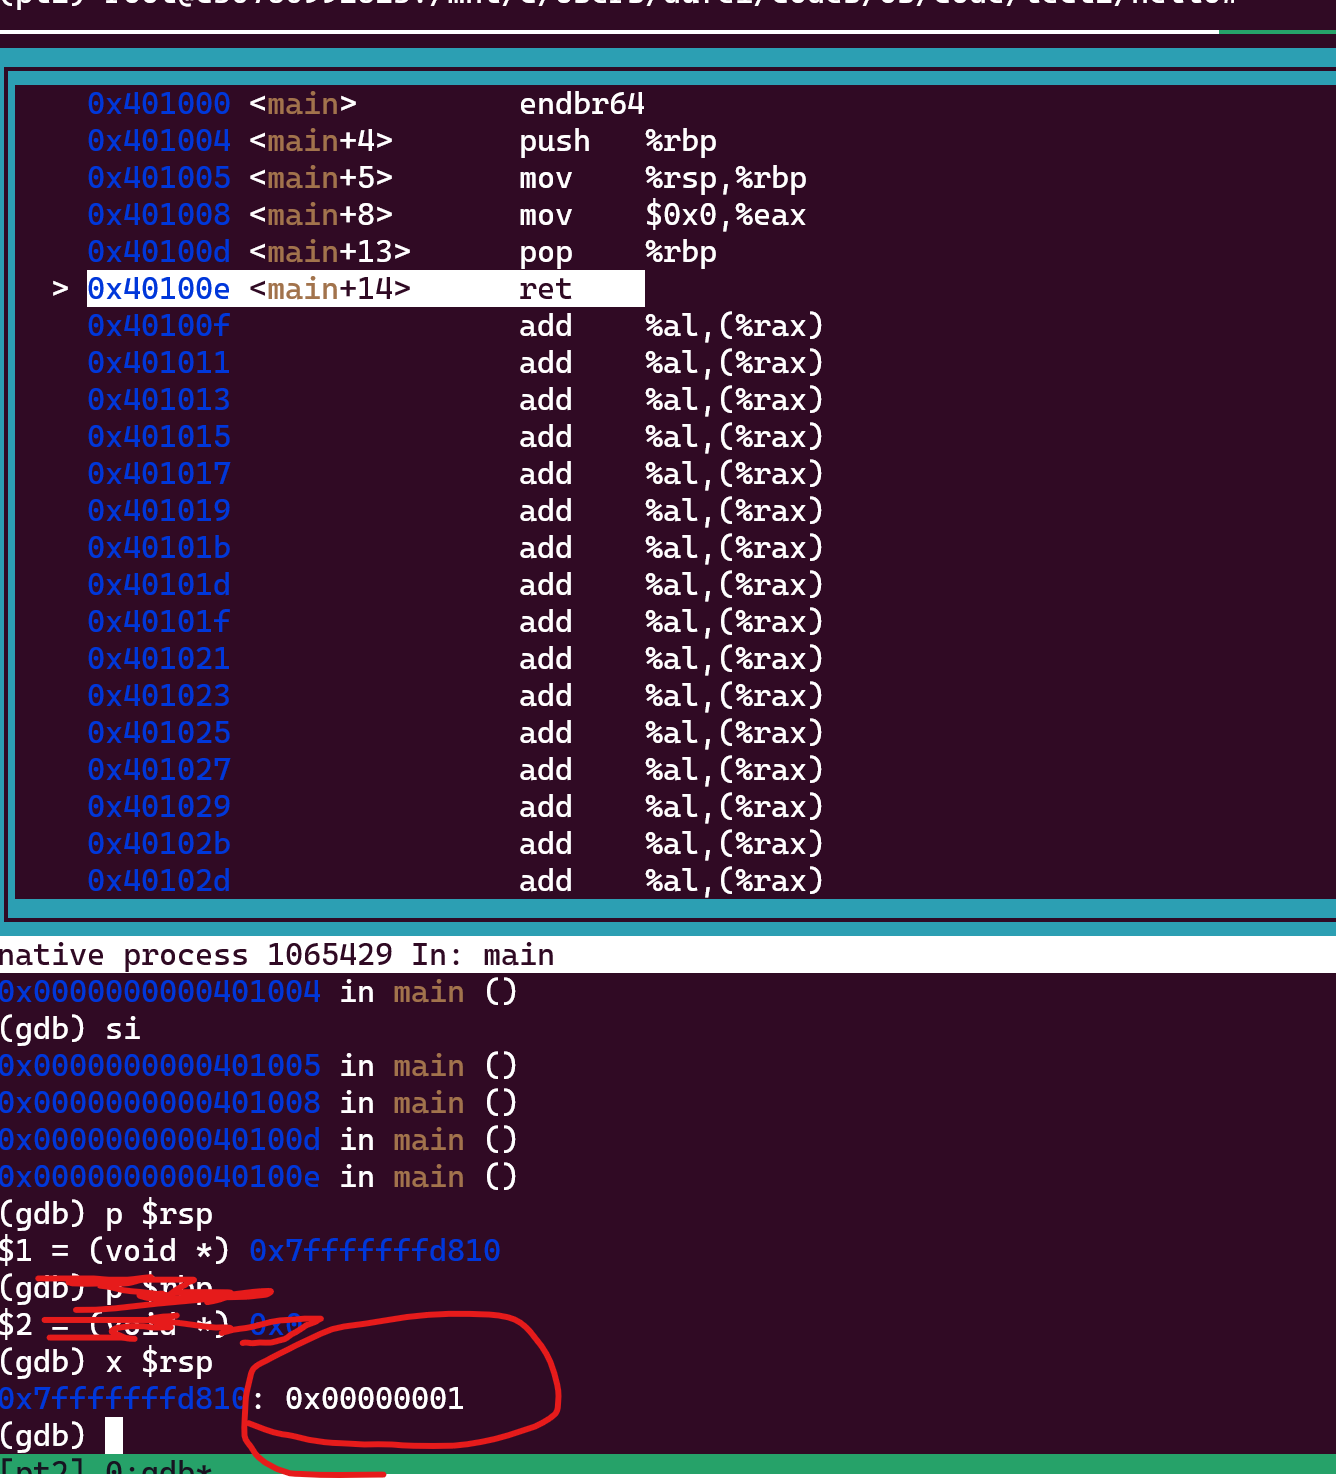

In [ ]:
返回的 1 地址不合法！！

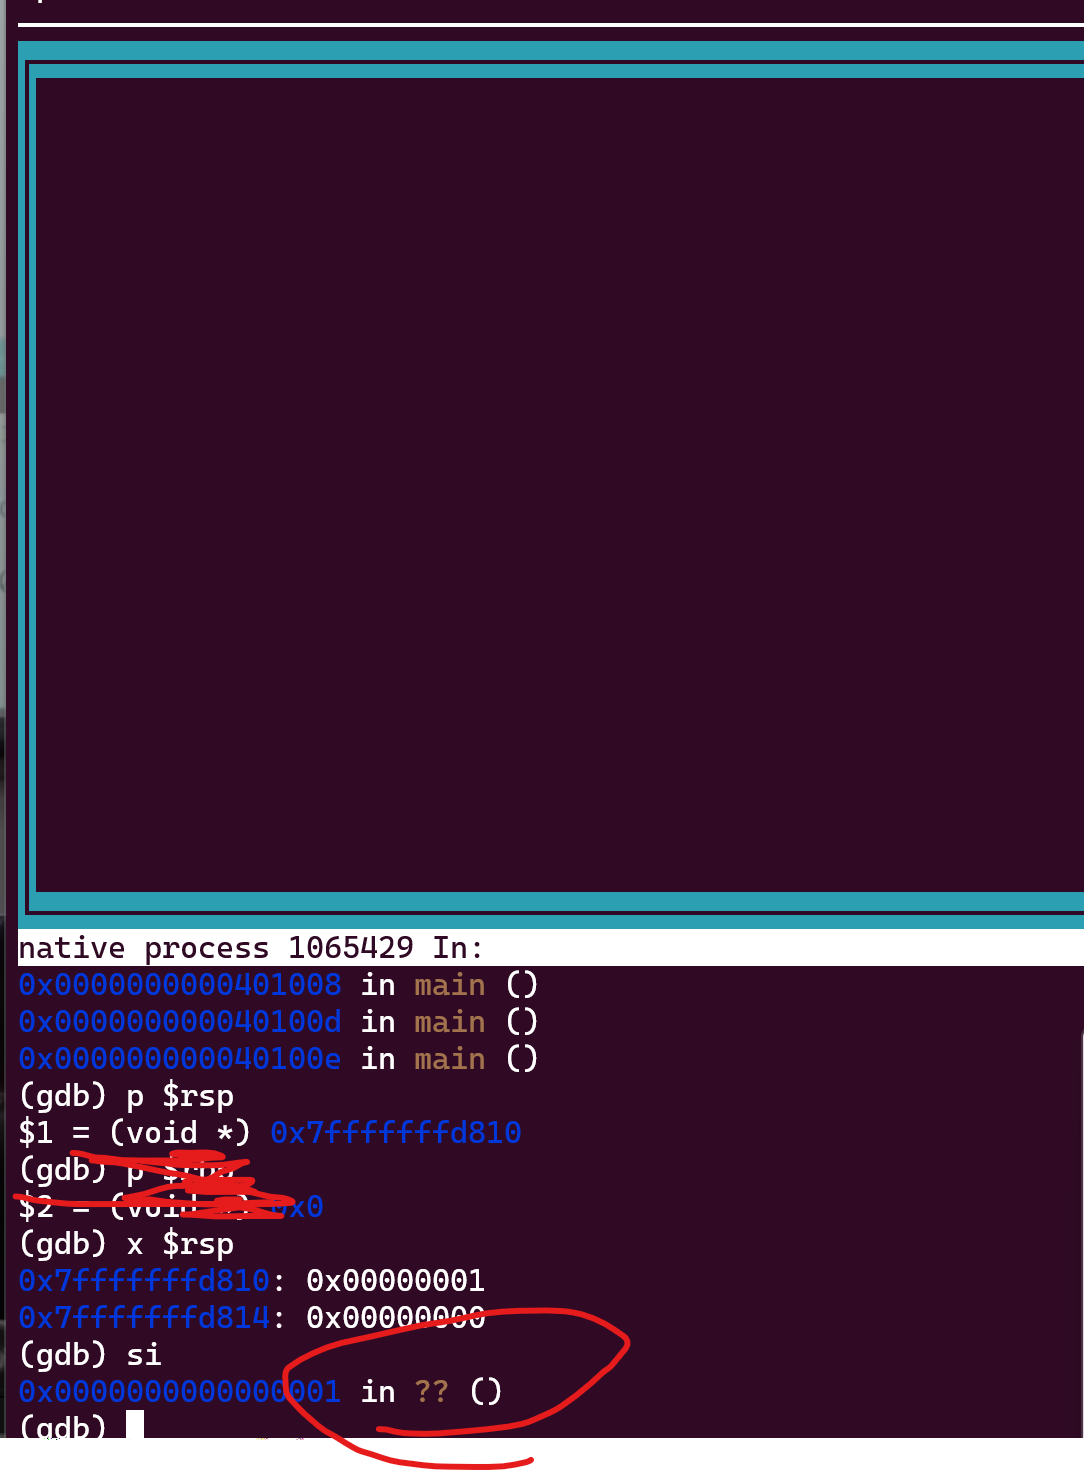

## 4. 最小的 hello world 

In [ ]:
我们的计算机系统是状态机，os 提供 syscall()， 程序停止
 minimal.S文件：


"""  这个程序不是很理解？？？
#include <sys/syscall.h>

.globl _start
_start:
  movq $SYS_write, %rax   // write(
  movq $1,         %rdi   //   fd=1,
  movq $st,        %rsi   //   buf=st,
  movq $(ed - st), %rdx   //   count=ed-st
  syscall                 // );

  movq $SYS_exit,  %rax   // exit(
  movq $1,         %rdi   //   status=1
  syscall                 // );

st:
  .ascii "\033[01;31mHello, OS World\033[0m\n"
ed:
"""

$ gcc -c minimal.S
$ ld minimal.o
$ ./a.out
Hello, OS World

In [ ]:
gcc -E minimal.S | less


# 1 "minimal.S"
# 1 "<built-in>"
# 1 "<command-line>"
# 31 "<command-line>"
# 1 "/usr/include/stdc-predef.h" 1 3 4
# 32 "<command-line>" 2
# 1 "minimal.S"





# 1 "/usr/include/x86_64-linux-gnu/sys/syscall.h" 1 3 4
# 24 "/usr/include/x86_64-linux-gnu/sys/syscall.h" 3 4
# 1 "/usr/include/x86_64-linux-gnu/asm/unistd.h" 1 3 4
# 20 "/usr/include/x86_64-linux-gnu/asm/unistd.h" 3 4
# 1 "/usr/include/x86_64-linux-gnu/asm/unistd_64.h" 1 3 4
# 21 "/usr/include/x86_64-linux-gnu/asm/unistd.h" 2 3 4
# 25 "/usr/include/x86_64-linux-gnu/sys/syscall.h" 2 3 4




# 1 "/usr/include/x86_64-linux-gnu/bits/syscall.h" 1 3 4
# 30 "/usr/include/x86_64-linux-gnu/sys/syscall.h" 2 3 4
# 7 "minimal.S" 2

.globl _start
_start:
  movq $1, %rax
  movq $1, %rdi
  movq $st, %rsi
  movq $(ed - st), %rdx
  syscall

  movq $60, %rax
  movq $1, %rdi
  syscall

st:
  .ascii "\033[01;31mHello, OS World\033[0m\n"
ed:
~
~
~
~

In [ ]:
man 2 syscalls
man 2 syscall

## 5, c语言的状态机模型

非递归汉诺塔

任何c语言代码--> 赋值，运算，if...goto，

这就是编译器
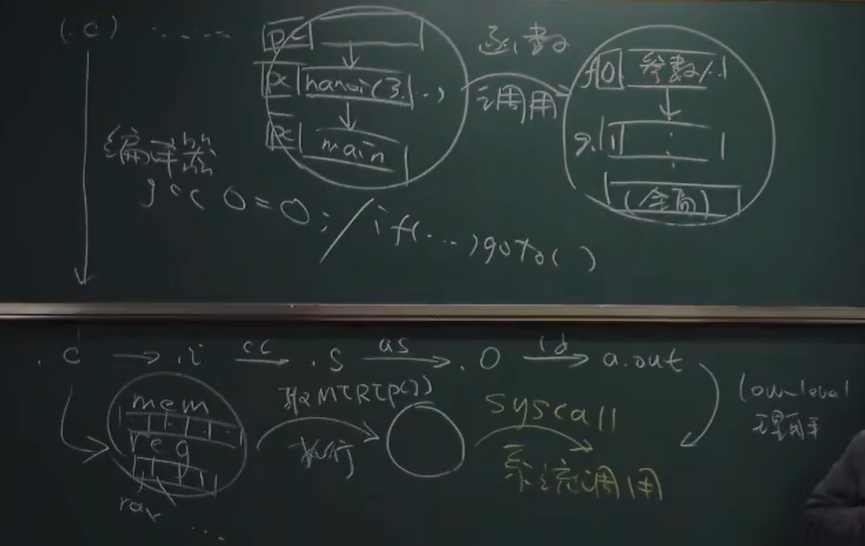

## 6 strace 打开程序的执行
将程序的所有系统调用打印出来

查看所有执行的系统调用系列

- gcc demo:

将strace 输出以管道的方式给文本编辑器：
strace -f gcc hello.c |& vim -

:set nowrap # 折叠

:set nu

:%!grep execve  # 只查看 包含 execve的行，初始状态创建

:%!grep -e execve -e open  # 查看打开了哪些文件，启动了哪些进程


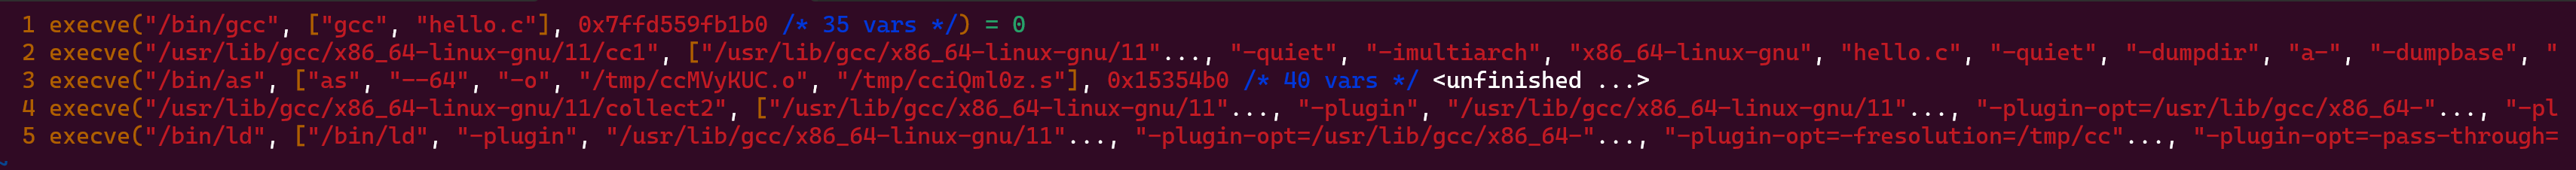

In [ ]:
1 execve("/bin/gcc", ["gcc", "hello.c"], 0x7ffd559fb1b0 /* 35 vars */) = 0
2 execve("/usr/lib/gcc/x86_64-linux-gnu/11/cc1", ["/usr/lib/gcc/x86_64-linux-gnu/11"..., "-quiet", "-imultiarch", "x86_64-linux-gnu", "hello.c", "-quiet", "-dumpdir", "a-", "-dumpbase", "  
3 execve("/bin/as", ["as", "--64", "-o", "/tmp/ccMVyKUC.o", "/tmp/cciQml0z.s"], 0x15354b0 /* 40 vars */ <unfinished ...>
4 execve("/usr/lib/gcc/x86_64-linux-gnu/11/collect2", ["/usr/lib/gcc/x86_64-linux-gnu/11"..., "-plugin", "/usr/lib/gcc/x86_64-linux-gnu/11"..., "-plugin-opt=/usr/lib/gcc/x86_64-"..., "-pl 
5 execve("/bin/ld", ["/bin/ld", "-plugin", "/usr/lib/gcc/x86_64-linux-gnu/11"..., "-plugin-opt=/usr/lib/gcc/x86_64-"..., "-plugin-opt=-fresolution=/tmp/cc"..., "-plugin-opt=-pass-through=~                                                                                                                                                                                            ~                                                                                                                                                                                            ~                

In [ ]:
vim执行： 
:%s/, /   \r/g
----------------------------
 1 execve("/bin/gcc"
  2 ["gcc"
  3 "hello.c"]
  4 0x7ffd559fb1b0 /* 35 vars */) = 0
  5 execve("/usr/lib/gcc/x86_64-linux-gnu/11/cc1"
  6 ["/usr/lib/gcc/x86_64-linux-gnu/11"...
  7 "-quiet"
  8 "-imultiarch"
  9 "x86_64-linux-gnu"
 10 "hello.c"
 11 "-quiet"
 12 "-dumpdir"
 13 "a-"
 14 "-dumpbase"
 15 "hello.c"
 16 "-dumpbase-ext"
 17 ".c"
 18 "-mtune=generic"
 19 "-march=x86-64"
 20 "-fasynchronous-unwind-tables"
 21 "-fstack-protector-strong"
 22 "-Wformat"
 23 "-Wformat-security"
 24 "-fstack-clash-protection"
 25 "-fcf-protection"
 26 "-o"
 27 "/tmp/cciQml0z.s"]
 28 0x15354b0 /* 40 vars */ <unfinished ...>
 29 execve("/bin/as"
 30 ["as"
 31 "--64"
 32 "-o"
 33 "/tmp/ccMVyKUC.o"
 34 "/tmp/cciQml0z.s"]
 35 0x15354b0 /* 40 vars */ <unfinished ...>
 36 execve("/usr/lib/gcc/x86_64-linux-gnu/11/collect2"
 37 ["/usr/lib/gcc/x86_64-linux-gnu/11"...
 38 "-plugin"
 39 "/usr/lib/gcc/x86_64-linux-gnu/11"...
 40 "-plugin-opt=/usr/lib/gcc/x86_64-"...
 41 "-plugin-opt=-fresolution=/tmp/cc"...
 42 "-plugin-opt=-pass-through=-lgcc"
 43 "-plugin-opt=-pass-through=-lgcc_"...
 44 "-plugin-opt=-pass-through=-lc"
 45 "-plugin-opt=-pass-through=-lgcc"
 46 "-plugin-opt=-pass-through=-lgcc_"...
 47 "--build-id"
 48 "--eh-frame-hdr"                                

## 7, 操作系统中 “任何程序” 的一生
任何程序 = minimal.S = 调用 syscall 的状态机

- 被操作系统加载

通过另一个进程执行 execve 设置为初始状态
- 状态机执行

    进程管理：fork, execve, exit, ...
    
    文件/设备管理：open, close, read, write, ...
    
    存储管理：mmap, brk, ...
- 调用 _exit (exit_group) 退出

